In [1]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\somaa\Desktop\train.csv")

In [3]:
data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


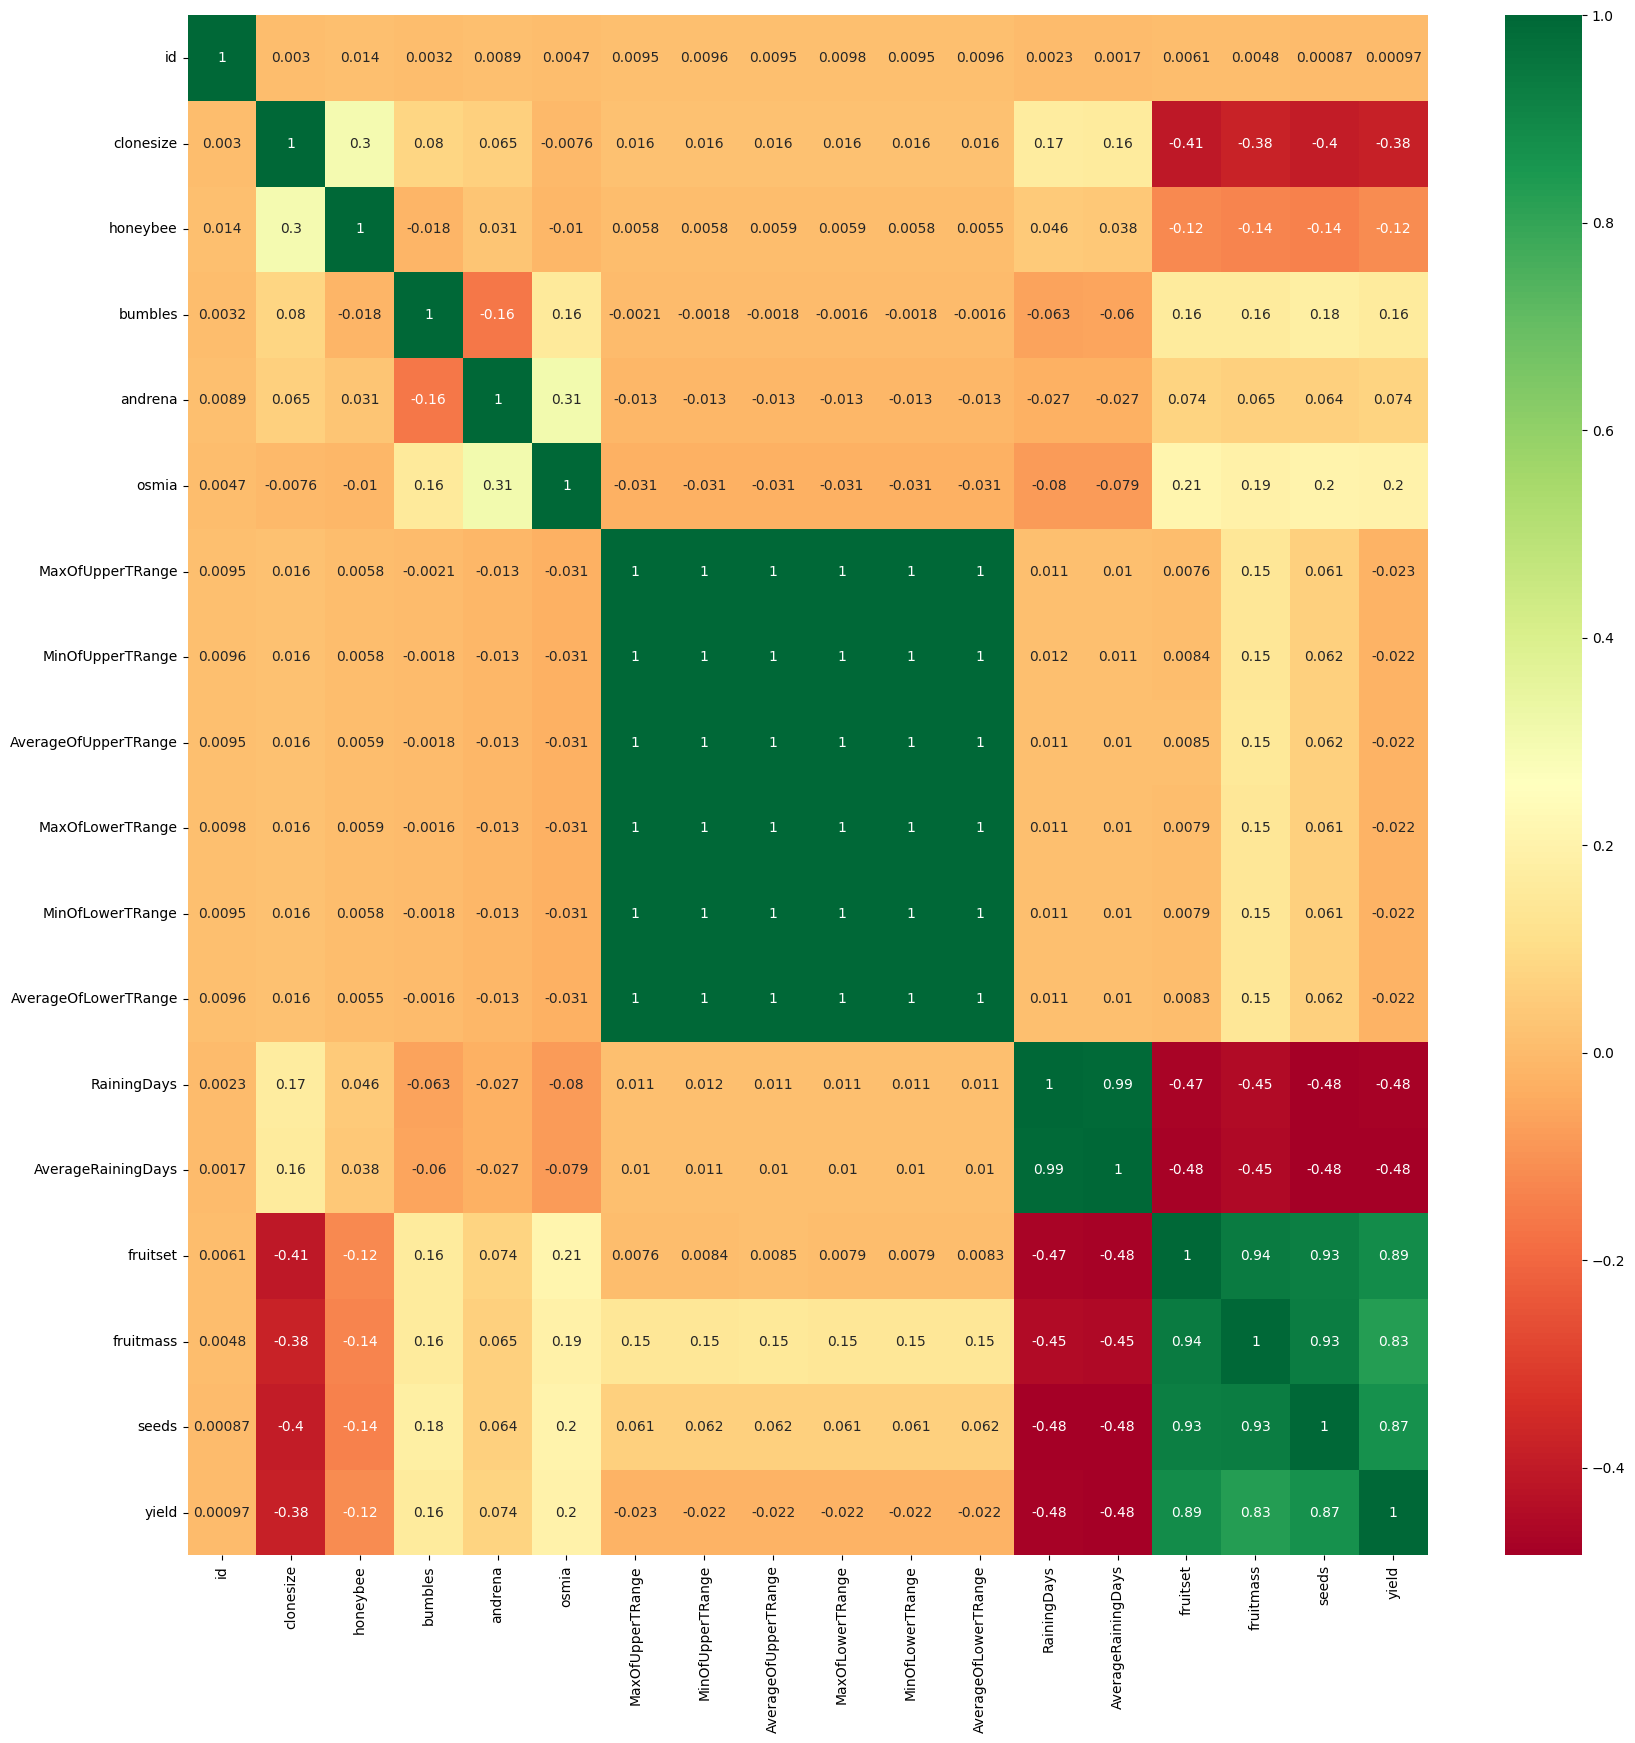

In [4]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot = True,cmap="RdYlGn")

In [5]:
data.shape

(15289, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
data.tail()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347
15288,15288,25.0,0.50,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.492077,0.446576,35.094733,5867.99722


In [8]:
data = data.drop(['id'],axis = 1)

In [9]:
data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [10]:
data.shape

(15289, 17)

In [11]:
data.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [12]:
x = data.drop('yield',axis = 1)
y = data['yield']


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [14]:
x_train.shape,x_test.shape

((10702, 16), (4587, 16))

In [15]:
model = XGBRegressor()

In [16]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [17]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

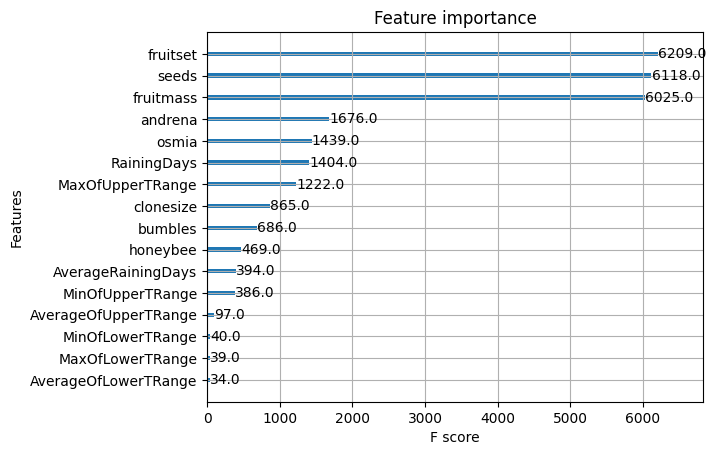

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(xgb1, ax = plt.gca())

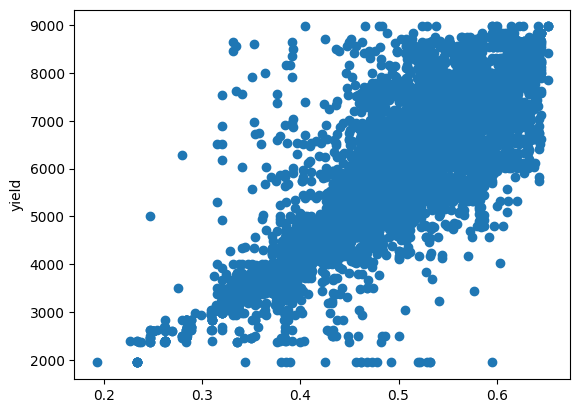

In [19]:
plt.scatter(data["fruitset"],data["yield"])
plt.ylabel("yield")
plt.show()

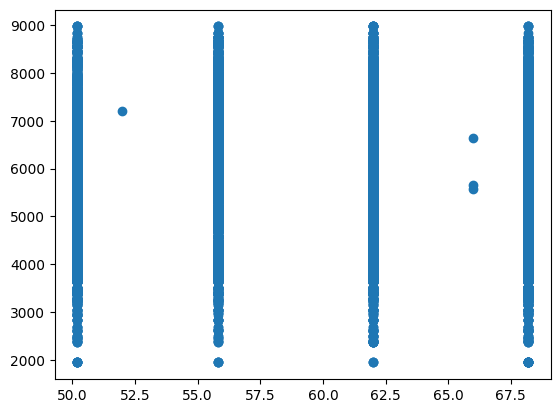

In [20]:
plt.scatter(data["MaxOfLowerTRange"], data["yield"])
plt.show()

In [21]:
predictions = xgb1.predict(x_test)


In [22]:
predictions[0:50]

array([5399.004 , 5112.4263, 4334.193 , 5556.8237, 7579.032 , 6150.0684,
       3362.171 , 5172.0137, 7325.7983, 3945.5474, 6744.498 , 4267.1353,
       7001.447 , 5604.8174, 7071.147 , 7335.7456, 6797.867 , 3154.5916,
       6932.2944, 5623.1787, 6787.381 , 6575.429 , 6449.866 , 5689.4585,
       5489.058 , 5671.9165, 6679.974 , 6239.0825, 5102.335 , 6193.0522,
       6596.6006, 7351.2725, 6926.1284, 4490.417 , 6682.601 , 5625.2114,
       6956.948 , 7043.551 , 7726.44  , 7151.5454, 5020.092 , 5833.3564,
       6187.725 , 7258.269 , 6831.916 , 5421.6543, 7457.7427, 5767.5723,
       5611.7397, 6256.2803], dtype=float32)

In [23]:
x_test.iloc[0]

clonesize               12.500000
honeybee                 0.250000
bumbles                  0.380000
andrena                  0.380000
osmia                    0.750000
MaxOfUpperTRange        69.700000
MinOfUpperTRange        42.100000
AverageOfUpperTRange    58.200000
MaxOfLowerTRange        50.200000
MinOfLowerTRange        24.300000
AverageOfLowerTRange    41.200000
RainingDays             24.000000
AverageRainingDays       0.390000
fruitset                 0.464366
fruitmass                0.412662
seeds                   33.532675
Name: 665, dtype: float64

In [24]:
y_test.iloc[0]

5791.45673

In [25]:
pred_train = xgb1.predict(x_train)

In [26]:
print(mean_absolute_error(y_train, pred_train))

192.00338286599833


In [27]:
xgb1.score(x_test,y_test)

0.8074922865394156

In [28]:
print(mean_absolute_error(y_test, predictions))

377.08757725021115


In [29]:
my_model_4 = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=4) 


# Fit the model
my_model_4.fit(x_train, y_train) # Your code here

# Get predictions
predictions_4 = my_model_4.predict(x_test)

# Calculate MAE
mae_4 = mean_absolute_error(predictions_4, y_test)

# Uncomment to print MAE

In [30]:
print(predictions_4)

[5481.0005 5294.869  3999.5913 ... 5959.8975 7143.958  5612.1963]


In [31]:
print(mae_4)

350.2761542601543


In [32]:
test1 = pd.read_csv(r"C:\Users\somaa\Desktop\test.csv")

In [33]:
test1.drop("id",axis = 1,inplace = True)

In [34]:


result = my_model_4.predict(test1)

In [35]:
submission=pd.DataFrame(result,columns=["yield"])

In [36]:
temp=pd.read_csv("test.csv")

In [37]:
submission["id"]=temp["id"]

In [38]:
submission=submission.iloc[:,::-1]

In [39]:
submission.to_csv("submission-----.csv",index=False)